<a href="https://colab.research.google.com/github/abulashsufans/Intermarket-Analysis/blob/main/intermarket_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INTERMARKET ANALYSIS: EXPLORING INDIAN STOCK MARKET'S CORRELATION WITH GLOBAL STOCKS, COMMODITIES, AND CURRENCIES**

### **LIBRARIES AND FUNCTIONS**

**Importing Libraries**



In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Function For Fetch Data**

In [ ]:
def fetch_data(ticker, start, end):
    data = yf.download(ticker, start=start, end=end)['Adj Close']
    return data

**Color Codes**

In [ ]:
color_5 = sns.color_palette("Blues")[5]
color_4 = sns.color_palette("Blues")[4]

### **GLOBAL INDICES**

**Data Collection And Cleaning**

In [ ]:
tickers = ["^NSEI", "^DJI", "^GSPC", "^IXIC", "^FTSE", "^N225", "000001.SS", "^HSI", "^GDAXI", "^FCHI", "^GSPTSE", "^AXJO"]
data = pd.concat([fetch_data(t, start="2019-01-01", end="2024-01-01") for t in tickers], axis=1)
data.columns = ["Nifty", "Dow", "S&P500", "Nasdaq", "FTSE", "Nikkei", "Shanghai", "HangSeng", "DAX", "CAC", "TSX", "ASX"]

data.dropna(inplace=True)
data.fillna(method='ffill', inplace=True)
data = data.asfreq('B').dropna()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


**Correlation Analysis**

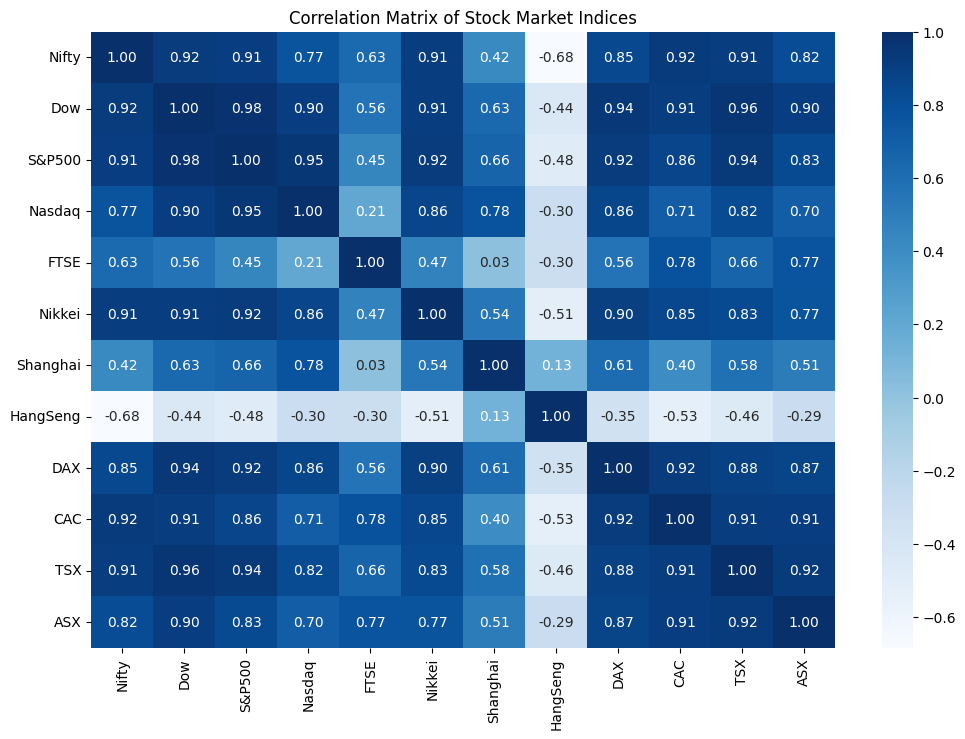

In [ ]:
correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt=".2f")
plt.title("Correlation Matrix of Stock Market Indices")
plt.show()

The correlation matrix illustrates that most global markets exhibit a positive correlation with the Indian stock market (Nifty). Notably, the Dow Jones and S&P 500 indices show the strongest positive correlation with Nifty, indicating that these US indices are highly aligned with the performance of the Indian market. In contrast, the Hang Seng index demonstrates the weakest correlation with Nifty, suggesting that the Hong Kong market's movements are less synchronized with those of the Indian market.


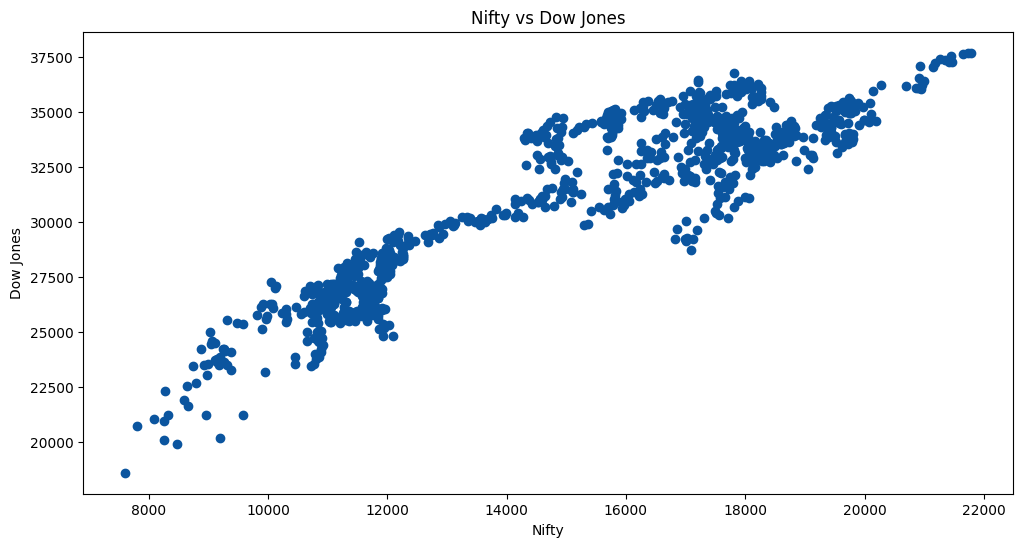

In [ ]:
plt.figure(figsize=(12, 6))
plt.scatter(data['Nifty'], data['Dow'], color=color_5)
plt.title('Nifty vs Dow Jones')
plt.xlabel('Nifty')
plt.ylabel('Dow Jones')
plt.show()

This scatter plot visualizes the relationship between the Nifty index and the Dow Jones index, which have the highest correlation among the compared indices.


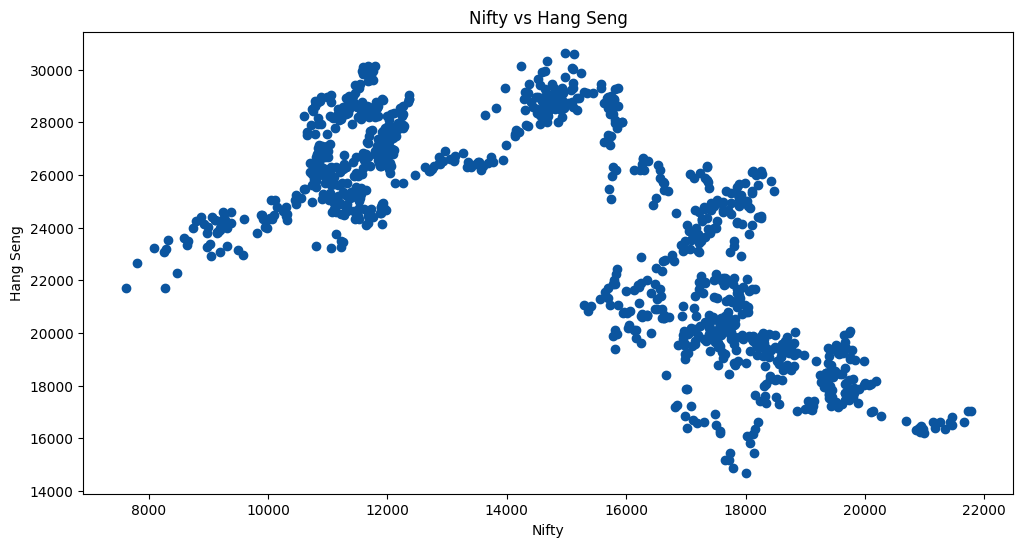

In [ ]:
plt.figure(figsize=(12, 6))
plt.scatter(data['Nifty'], data['HangSeng'], color=color_5)
plt.title('Nifty vs Hang Seng')
plt.xlabel('Nifty')
plt.ylabel('Hang Seng')
plt.show()

This scatter plot highlights the relationship between the Nifty index and the Hang Seng index, which exhibit the weakest correlation among the compared indices. Initially, there is a positive correlation between the two indices when the Nifty is within a range of up to 1500. However, beyond this range, the correlation turns negative, indicating that as the Nifty index increases further, the Hang Seng index tends to move in the opposite direction.

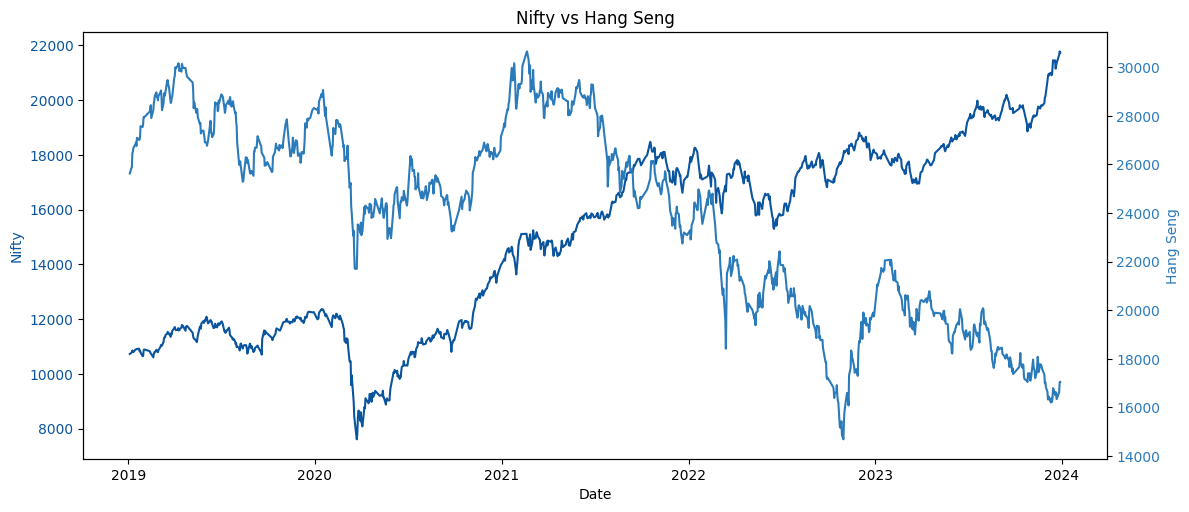

In [ ]:
fig, ax1 = plt.subplots(figsize=(12, 5))
ax1.set_xlabel('Date')
ax1.set_ylabel('Nifty', color=color_5)
ax1.plot(data.index, data['Nifty'], color=color_5, label='Nifty')
ax1.tick_params(axis='y', labelcolor=color_5)

ax2 = ax1.twinx()
ax2.set_ylabel('Hang Seng', color=color_4)
ax2.plot(data.index, data['HangSeng'], color=color_4, label='Hang Seng')
ax2.tick_params(axis='y', labelcolor=color_4)
fig.tight_layout()
plt.title('Nifty vs Hang Seng')
plt.show()

To further explore the correlation between Nifty and Hang Seng, we plotted a dual-axis line chart. This visualization clearly shows that Nifty and Hang Seng were correlated up to a certain range, after which their relationship diverges. Initially, both indices move in tandem, indicating a positive correlation. However, beyond a specific point, their movements no longer align, illustrating a shift in their correlation

### **COMMODITIES**

**Data Collection And Cleaning(Gold)**

In [ ]:
nt = "^NSEI"
gt = "GC=F"

nifty = fetch_data(nt, start="2018-01-01", end="2022-01-01")
gold = fetch_data(gt, start="2018-01-01", end="2022-01-01")

data = pd.concat([nifty, gold], axis=1)
data.columns = ['Nifty', 'Gold']

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


**Correlation Analysis(Gold)**

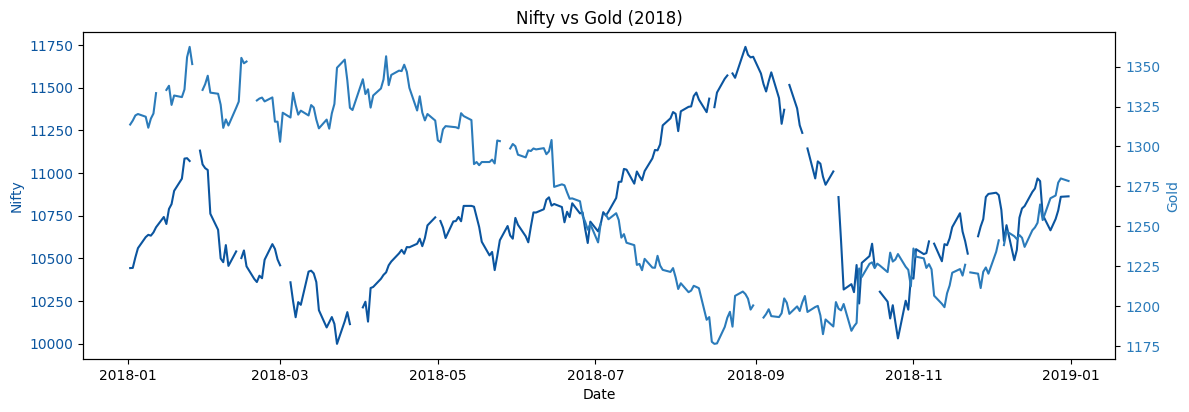

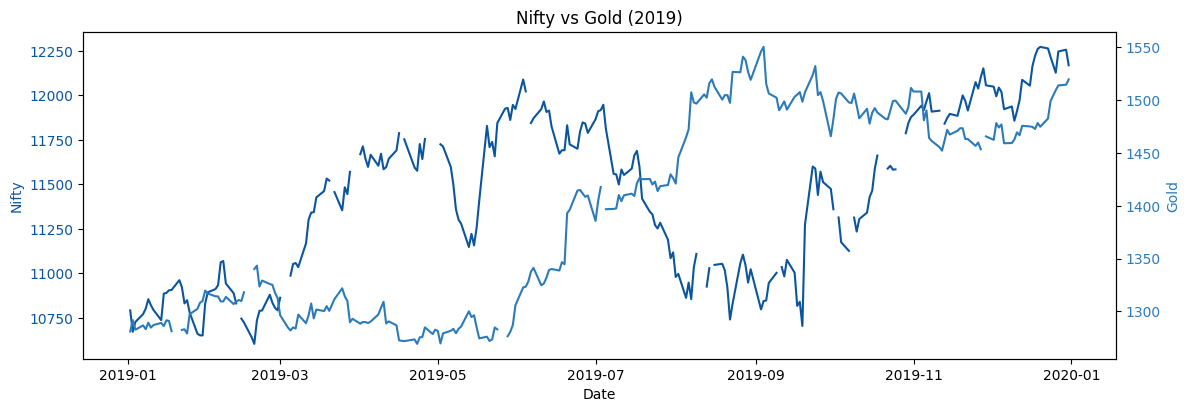

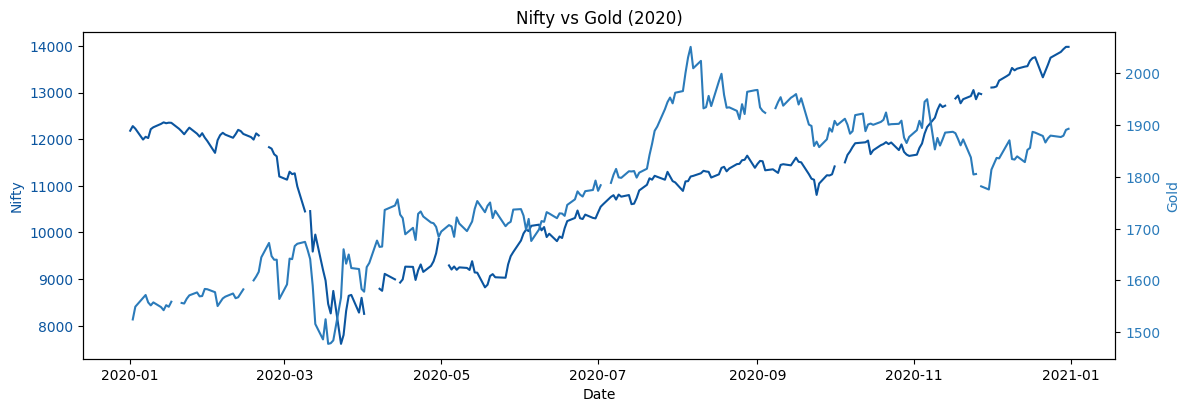

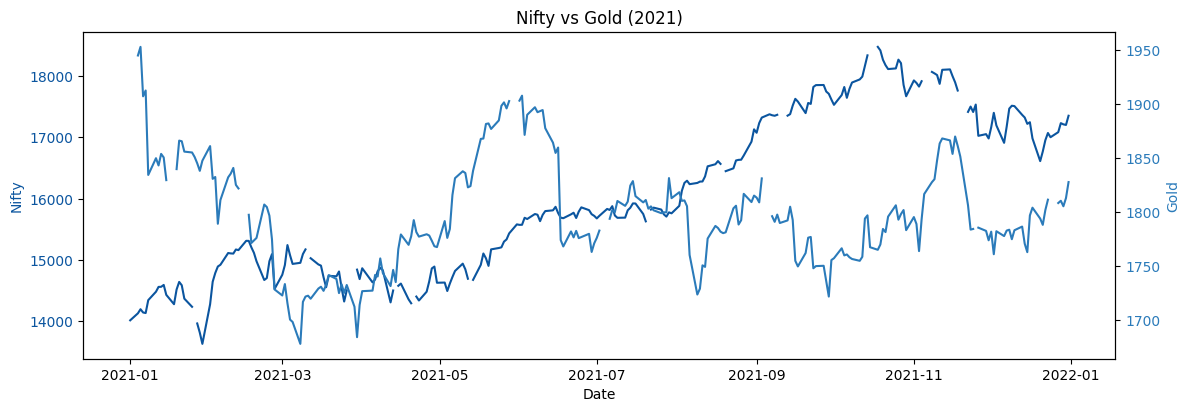

In [ ]:
years = data.index.year.unique()

for year in years:
    yearly_data = data[data.index.year == year]
    fig, ax1 = plt.subplots(figsize=(12, 4))

    ax1.set_xlabel('Date')
    ax1.set_ylabel('Nifty', color=color_5)
    ax1.plot(yearly_data.index, yearly_data['Nifty'], color=color_5)
    ax1.tick_params(axis='y', labelcolor=color_5)

    ax2 = ax1.twinx()
    ax2.set_ylabel('Gold', color=color_4)
    ax2.plot(yearly_data.index, yearly_data['Gold'], color=color_4)
    ax2.tick_params(axis='y', labelcolor=color_4)

    fig.tight_layout()
    plt.title(f'Nifty vs Gold ({year})')
    plt.show()
    print()

By plotting the Nifty index against Gold prices for each year, we observed that Nifty and Gold do not exhibit a strong overall correlation. However, there are notable periods where a negative correlation emerges, particularly during significant market downturns or upswings. This pattern suggests that during times of market stress or volatility, investors may perceive Gold as a safe-haven asset, leading to an inverse relationship with the Nifty index.

**Data Collection And Cleaning(Crude Oil)**

In [ ]:
cr = "CL=F"
nt = "^NSEI"

cr_data = fetch_data(cr, start="2018-01-01", end="2022-01-01")
nt_data = fetch_data(nt, start="2018-01-01", end="2022-01-01")

data = pd.concat([cr_data, nt_data], axis=1)
data.columns = ['Crude', 'Nifty']

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


**Correlation Analysis(Crude Oil)**

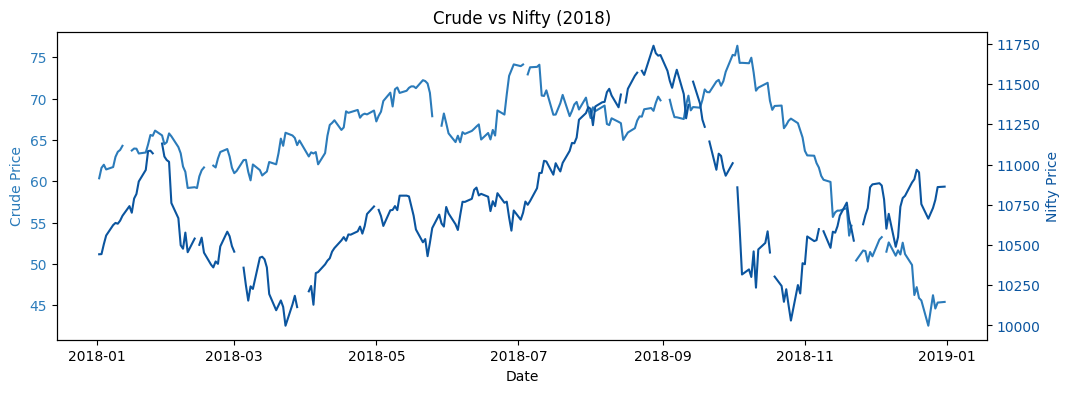

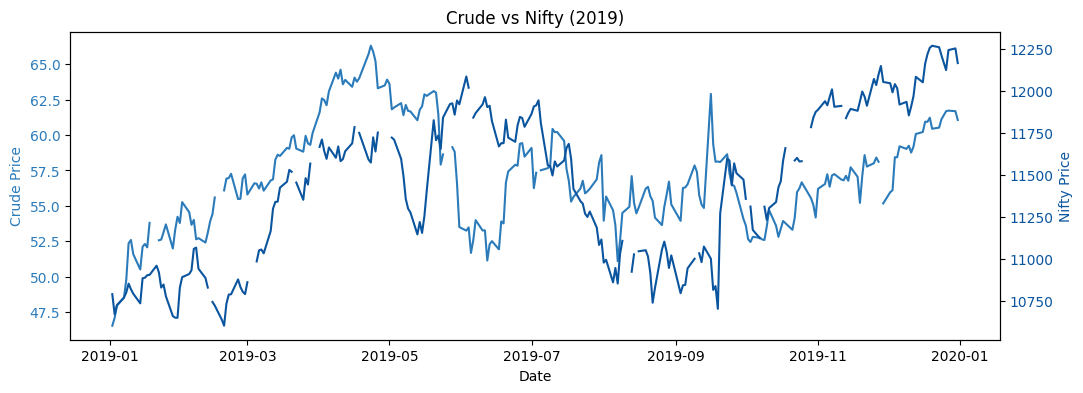

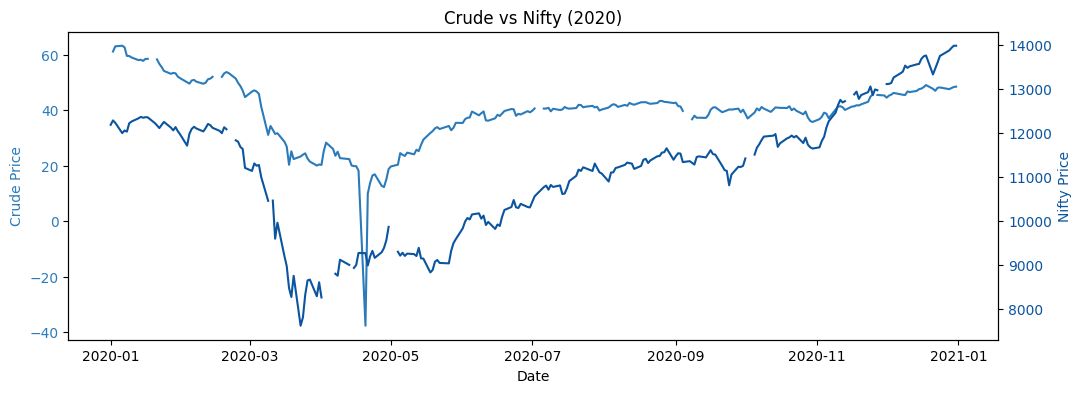

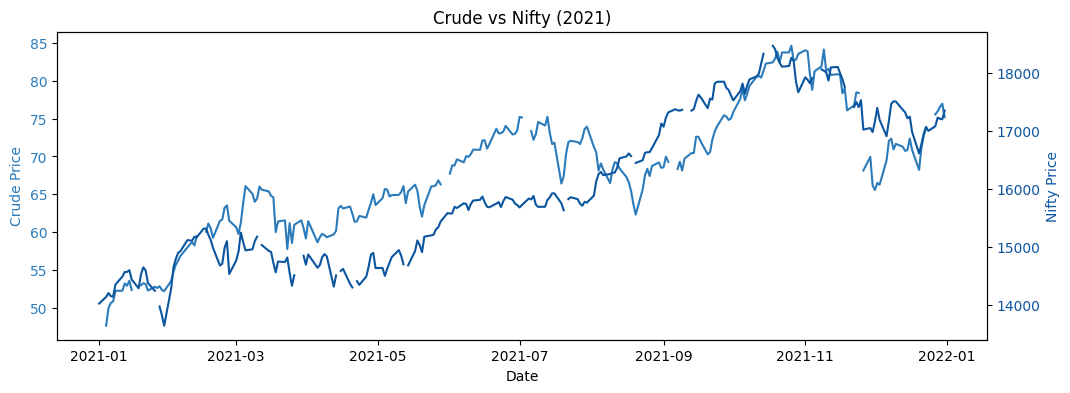

In [ ]:
years = range(2018, 2022)
for year in years:
    yearly_data = data[data.index.year == year]
    fig, ax1 = plt.subplots(figsize=(12, 4))

    ax1.plot(yearly_data.index, yearly_data['Crude'], color=color_4)
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Crude Price', color=color_4)
    ax1.tick_params(axis='y', labelcolor=color_4)

    ax2 = ax1.twinx()
    ax2.plot(yearly_data.index, yearly_data['Nifty'], color=color_5)
    ax2.set_ylabel('Nifty Price', color=color_5)
    ax2.tick_params(axis='y', labelcolor=color_5)

    plt.title(f'Crude vs Nifty ({year})')
    plt.show()
    print()

Analyzing the relationship between Crude Oil prices and the Nifty index for each year from 2018 to 2022 reveals that Crude Oil prices often follow trends in the stock market. Specifically, we observe that peaks and troughs in Crude Oil prices tend to occur shortly after corresponding highs and lows in the Nifty index. This pattern suggests that rising Nifty prices, indicative of economic growth, may lead to increased global demand for Crude Oil.

### **CURRENCIES**

**Data Collection And Cleaning**

In [ ]:
tickers = ['^NSEI', 'USDINR=X', 'EURINR=X', 'JPYINR=X', 'GBPINR=X',
           'AUDINR=X', 'EURUSD=X', 'USDJPY=X', 'GBPUSD=X', 'AUDUSD=X', 'USDCNY=X']

data = pd.concat([fetch_data(t, start="2018-01-01", end="2022-01-01") for t in tickers], axis=1)
data.columns = ["Nifty", "USD/INR", "EUR/INR", "JPY/INR", "GBP/INR", "AUD/INR", "EUR/USD",
                "USD/JPY", "GBP/USD", "AUD/USD", "USD/CNY"]

data.dropna(inplace=True)
data.fillna(method='ffill', inplace=True)
data = data.asfreq('B').dropna()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


**Correlation Analysis**

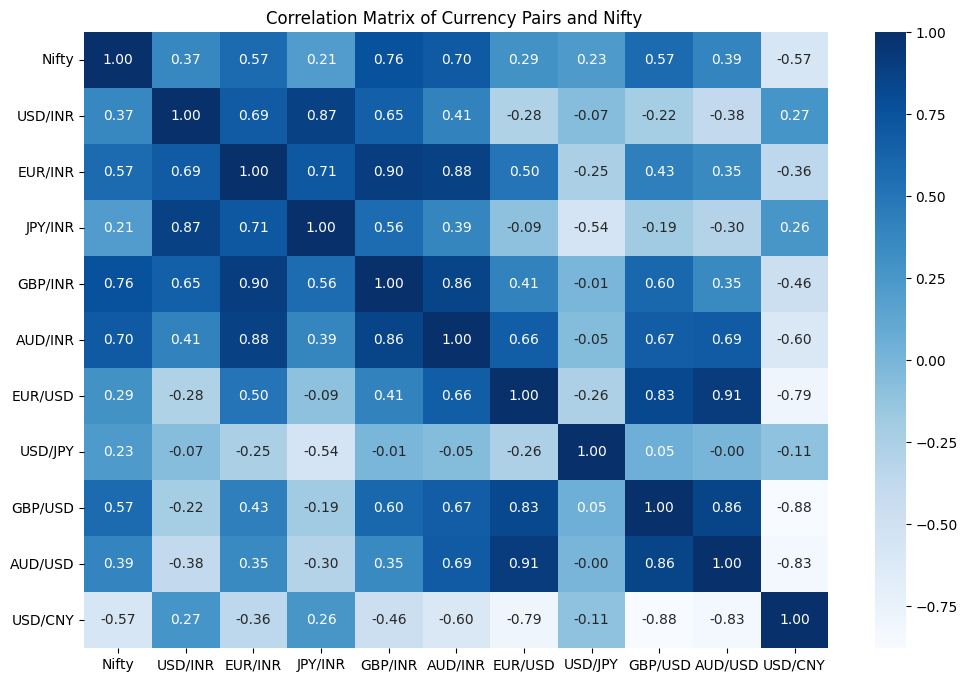

In [ ]:
correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt=".2f")
plt.title("Correlation Matrix of Currency Pairs and Nifty ")
plt.show()

The correlation matrix between various currency pairs and the Nifty index indicates that there is no strong positive or negative correlation between the currencies and the Nifty. This suggests that fluctuations in currency values do not have a significant impact on the movements of the Indian stock market, or vice versa.

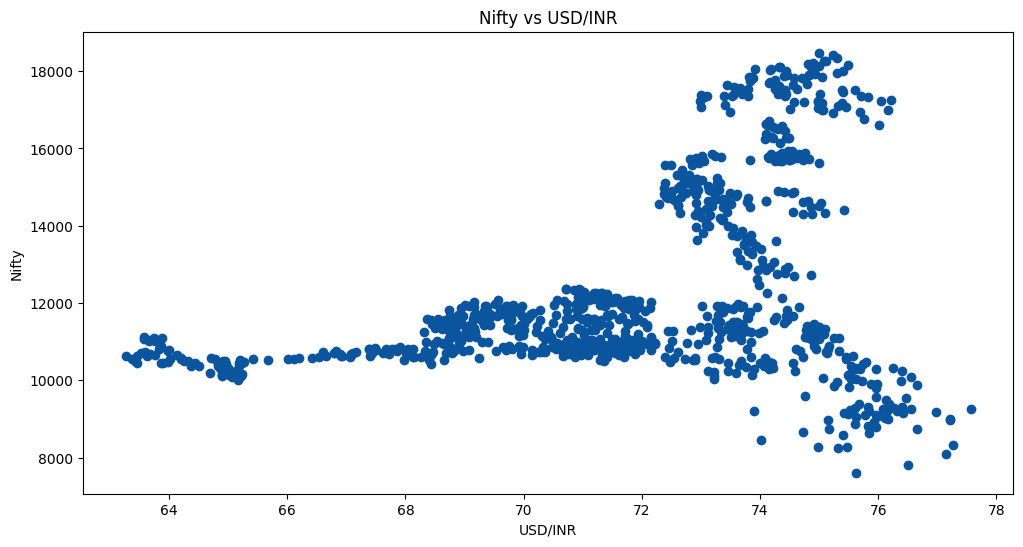

In [ ]:
plt.figure(figsize=(12, 6))
plt.scatter(data['USD/INR'], data['Nifty'], color=color_5)
plt.title('Nifty vs USD/INR')
plt.xlabel('USD/INR')
plt.ylabel('Nifty')
plt.show()

 When plotting the relationship between the Nifty index and USD/INR, a considered global currency, we observe that the correlation is not distinctly positive or negative. Instead, the scatter plot reveals a mixed pattern, where at times the movements in USD/INR align with those of Nifty (both increasing or decreasing), while at other times, they move in opposite directions.

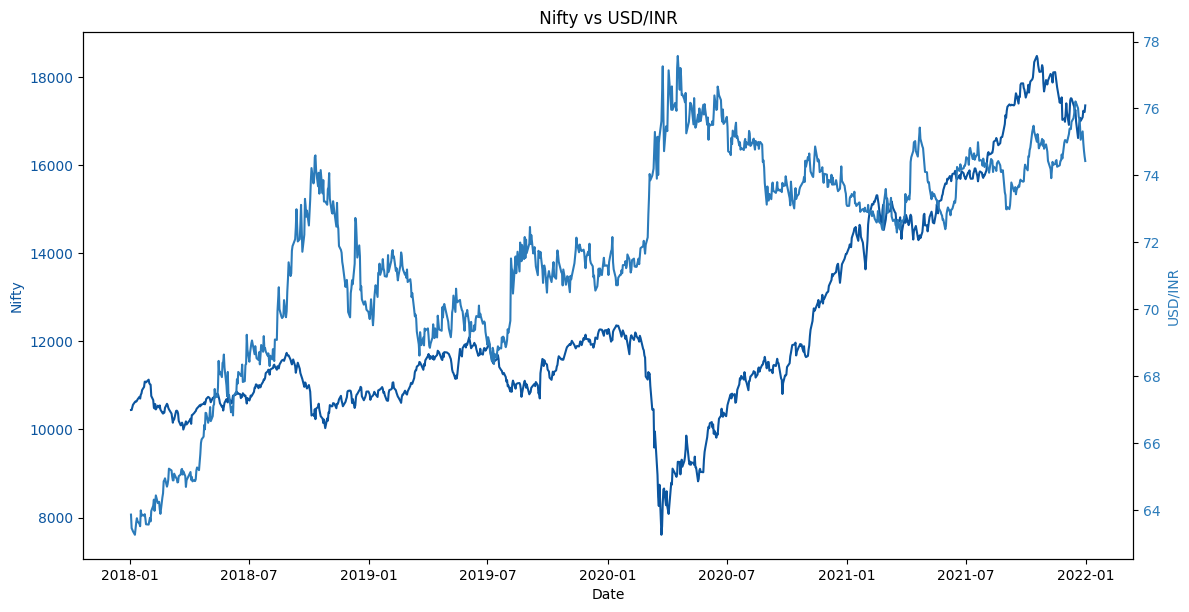

In [ ]:
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.set_xlabel('Date')
ax1.set_ylabel('Nifty', color=color_5)
ax1.plot(data.index, data['Nifty'], color=color_5)
ax1.tick_params(axis='y', labelcolor=color_5)

ax2 = ax1.twinx()
ax2.set_ylabel('USD/INR', color=color_4)
ax2.plot(data.index, data['USD/INR'], color=color_4)
ax2.tick_params(axis='y', labelcolor=color_4)

fig.tight_layout()
plt.title(' Nifty vs USD/INR ')
plt.show()

To delve deeper into the relationship, we plotted a line chart depicting the movements of Nifty and USD/INR over time. The chart reveals that over the long term, both Nifty and USD/INR tend to move in the same direction, indicating a general alignment in their trends. However, during periods of market volatility, such as the COVID crash, a negative correlation emerges, suggesting that fluctuations in economic growth in India can influence the appreciation or depreciation of the INR against the USD.

### **PREDICTIVE MODEL**

**Data Collection And Cleaning**

In [ ]:
nifty_ticker = "^NSEI"
dow_ticker = "^DJI"

nifty = fetch_data(nifty_ticker, start="2018-01-01", end="2023-01-01")
dow = fetch_data(dow_ticker, start="2018-01-01", end="2023-01-01")

dow_shifted = dow.shift(-1)

combined = pd.concat([nifty, dow_shifted], axis=1)
combined.columns = ["Nifty", "Prev_Dow"]
combined.dropna(inplace=True)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


**Regression Plot**

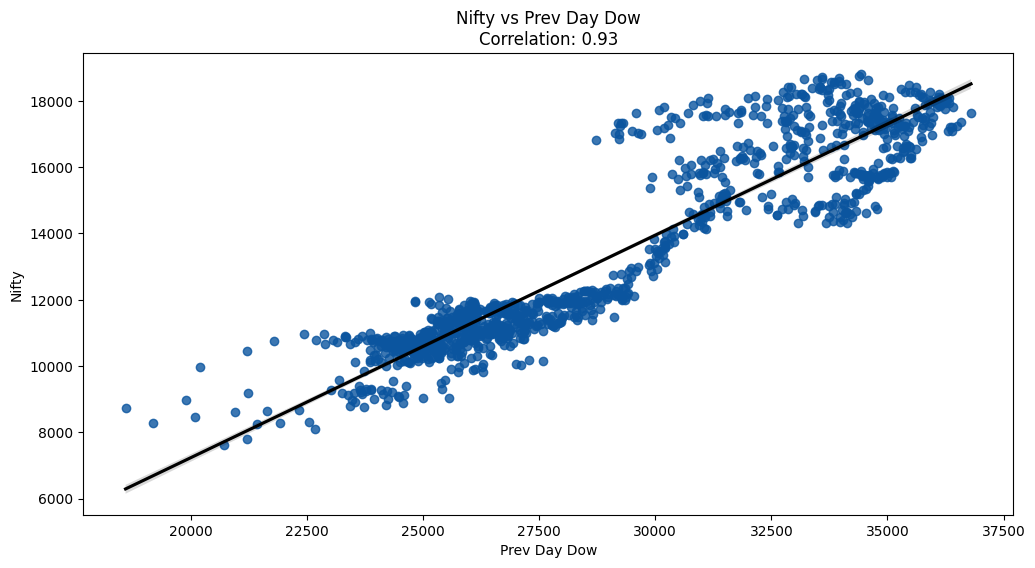

In [ ]:
corr_coeff = combined.corr().iloc[0, 1]

sns.set_palette(sns.color_palette("Blues"))

plt.figure(figsize=(12, 6))
sns.regplot(x="Prev_Dow", y="Nifty", data=combined, scatter_kws={'color': color_5 , 'edgecolor': color_5}, line_kws={'color': 'black'})
plt.title(f"Nifty vs Prev Day Dow\nCorrelation: {corr_coeff:.2f}")
plt.xlabel("Prev Day Dow")
plt.ylabel("Nifty")
plt.show()

To build a predictive model, we utilize a regression plot between the previous day's Dow close and the current day's Nifty close. This choice is informed by the strong correlation observed between these variables. Notably, the Dow closes at 1:30 AM IST (Indian Standard Time), while the Nifty opens at 9:15 AM IST that day. This time gap allows for predictive insights based on earlier market movements in the Dow.

**Predictive Model And Evaluation**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

X = combined[['Prev_Dow']]
y = combined['Nifty']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)

print(f"R-squared: {r2}")

R-squared: 0.8799124155026139


Utilizing linear regression, we assessed the model's performance by calculating the R-squared value. The obtained R-squared value is 0.8799, indicating a strong fit between the predicted and actual Nifty values. This high R-squared value suggests that the linear regression model captures a substantial portion of the variance in Nifty movements, indicating its effectiveness in predicting Nifty values based on the previous day's Dow closing price.

**Prediction**

In [ ]:
dow_close_today = float(input("Enter today's Dow close: "))

nifty_close_predicted = model.predict([[dow_close_today]])
print(f"Predicted Nifty Close for Tomorrow: {nifty_close_predicted[0]}")

Enter today's Dow close: 1000
Predicted Nifty Close for Tomorrow: -5607.734762975434


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


This interactive feature allows for the prediction of Nifty's closing price for today by inputting the Dow's previous day close. By entering the Dow's close, the model predicts the corresponding Nifty close for today. This hands-on approach enables users to obtain real-time predictions based on the latest Dow closing price.